## Problem Statement
### Bike Sharing System
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal
The goal is to design a mulitple linear regression model about the demand for shared bikes with the available independent variables. This data will be used by the management to understand how exactly the demands vary with different features. Also this model will provide a good way for the management to understand the demand dynamics of the market.

## Data Initialization

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all the libraries need for the case study
import pandas as pd #to read the data in dataframes
import numpy as np #Numpy library needed for mathematical computation
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # Useful for data visualisation
%matplotlib inline

In [3]:
#Reading csv file and display few rows to see the data set
#low_memory is set False to overcome a warning message
bike_df = pd.read_csv('day.csv',header=0,low_memory=False)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Check the shape of the bike sharing data set
bike_df.shape

(730, 16)

The data set contains **730 Rows and 16 Columns**

In [5]:
#Checking out the information of the bike sharing data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In this data we have only one object **dteday** and all other variables has numeric values.

In [6]:
#Check the column names in the data set
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

We have 16 columns which gives details on number of bikes booked (causual or registered) with weather details of that particular day.

In [7]:
#Let us check the size of the data set
bike_df.size

11680

In [8]:
#Checking the data types of the data
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#check the dimensions of data
bike_df.ndim

2

In [10]:
#Let us see how the data set looks like
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Use decribe to see more details of the data set. It will give us min, max value, standard deviation, mean and counts. Also we can verify whether any outliers are present in this data.

## Data Cleaning
  Under Data cleaning, we have certain ways to follow:
- Checking duplicate values
- Fixing missing values
- Standardising Values
- Fix Invalid Values
- Filtering data

### Check for Null and Missing values:

In [11]:
#Check the number of Null values in each column
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We dont have any null values in each column. All columns have valid values.

In [12]:
#Check whether any NA values are found in the data set
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In this data set, we see that there is no NaN values. All rows have proper values.

In [13]:
#Identify whether any duplicates are available in the data set
bike_dfdup = bike_df
bike_dfdup.drop_duplicates(subset=None, inplace=True)

In [14]:
bike_dfdup.shape, bike_df.shape

((730, 16), (730, 16))

Here the shape of the duplicate is same as that of the original data frame even after dropping the duplicates. So there are no duplicates in this data set.

In [15]:
#Let us see what bike sharing data contains
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the above data set, we can see that all the categorical variables are already in numeric format. And few variables like temp, atemp, hum, windspeed, casual, registered and cnt are continuous variables. dteday is in datetime format. **instant** column gives the index number for the given data set. So we can safely drop this column.

In [16]:
# Dropping instant column as it index column for the number of record data
bike_df.drop(['instant'], axis = 1, inplace = True)

Let us visualize the data by pairplot to see the correlation between the variables.

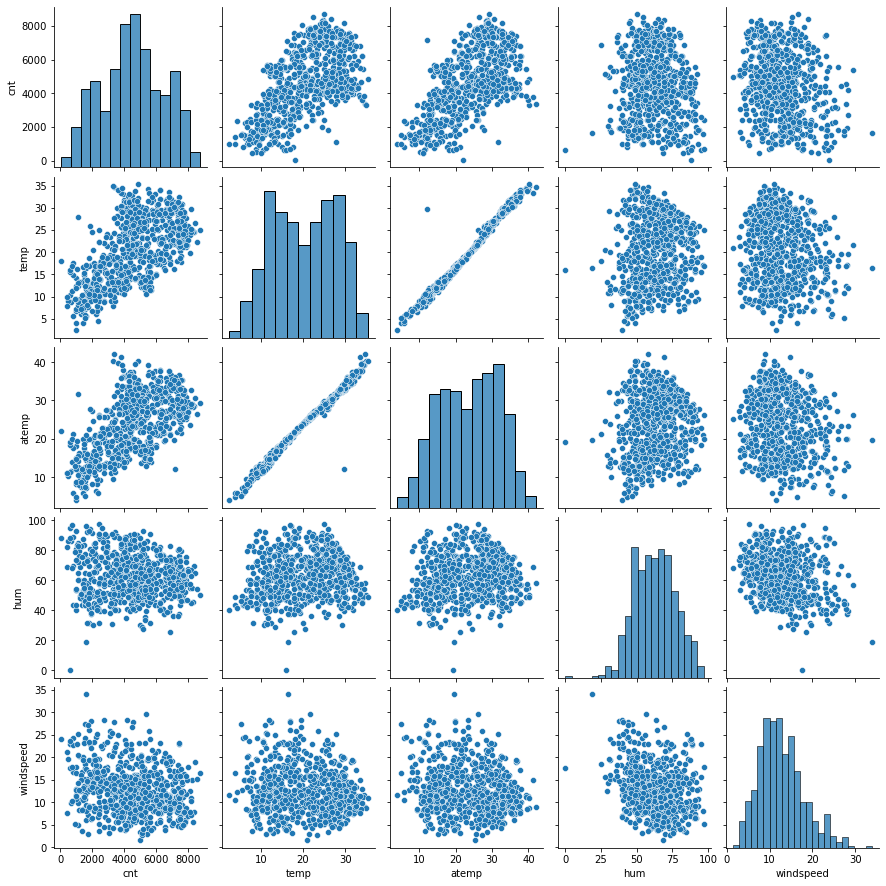

In [17]:
#Let us pairplot for numeric variables
sns.pairplot(bike_df[['cnt','temp','atemp','hum','windspeed']])
plt.show()

In the above plot, we see **temp** and **atemp** are highly correlated. **atemp** is dependent on the **temp** variable. Let us check with regression plot and see the correlation between these two variables.

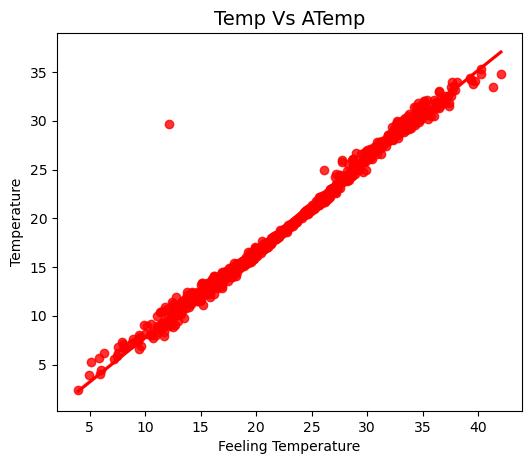

In [18]:
#Regression plot for temp and atemp
plt.figure(figsize=(6,5),dpi=100)
plt.title("Temp Vs ATemp",fontsize=14)
sns.regplot(data=bike_df,y="temp",x="atemp",color='r')
plt.xlabel("Feeling Temperature")
plt.ylabel("Temperature")
plt.show()

From the above figure, we could see that both variables are highly correlated. Hence we could drop one of the variable. For our analysis, let us drop **atemp** from the data set.

In [19]:
#Drop the variable
bike_df.drop(['atemp'], axis = 1, inplace = True)

We could drop **dteday** since we have month, year and weekday details in our data set. So let us not derive any new variable from this data.

In [20]:
#Drop the variable
bike_df.drop(['dteday'], axis = 1, inplace = True)

Here **casual** and **registered** represents the booking of causual and registered users. We have **cnt** column which represents the total of casual and registered column. Management is interested in the total booking count rather other two. So let us drop both variables from our data set.

In [21]:
#Drop the variable
bike_df.drop(['casual','registered'], axis = 1, inplace = True)

In [22]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

After dropping off few variables, we now have 11 variables.

## Data Visualization
Let us do Univariate, Bi-variate and Multi-variate analysis for bike data set.

In [23]:
#Check the value counts for holiday
bike_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [24]:
#Check the value counts for workingday
bike_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

Both the holiday and workingday has 0 and 1 values.

In [25]:
#Check the value counts for weekday
bike_df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

We have data for all the days in the week

In [26]:
#Check the value counts for season
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

We have data for all the seasons in the year.

In [27]:
#Check the value counts for weather situation
bike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

We have only data for three weather situations. There is no data for the weather which is either Heavy rain/ Snowy Day.

Let us see how the variables are correlated using the correlation function on the data set.

In [28]:
#Check correlation for all the variables
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132


Using the above correlation table, we see that few variables like **temp** is correlated with the **cnt** target variable. 

Let us visualize the data using pairplot.

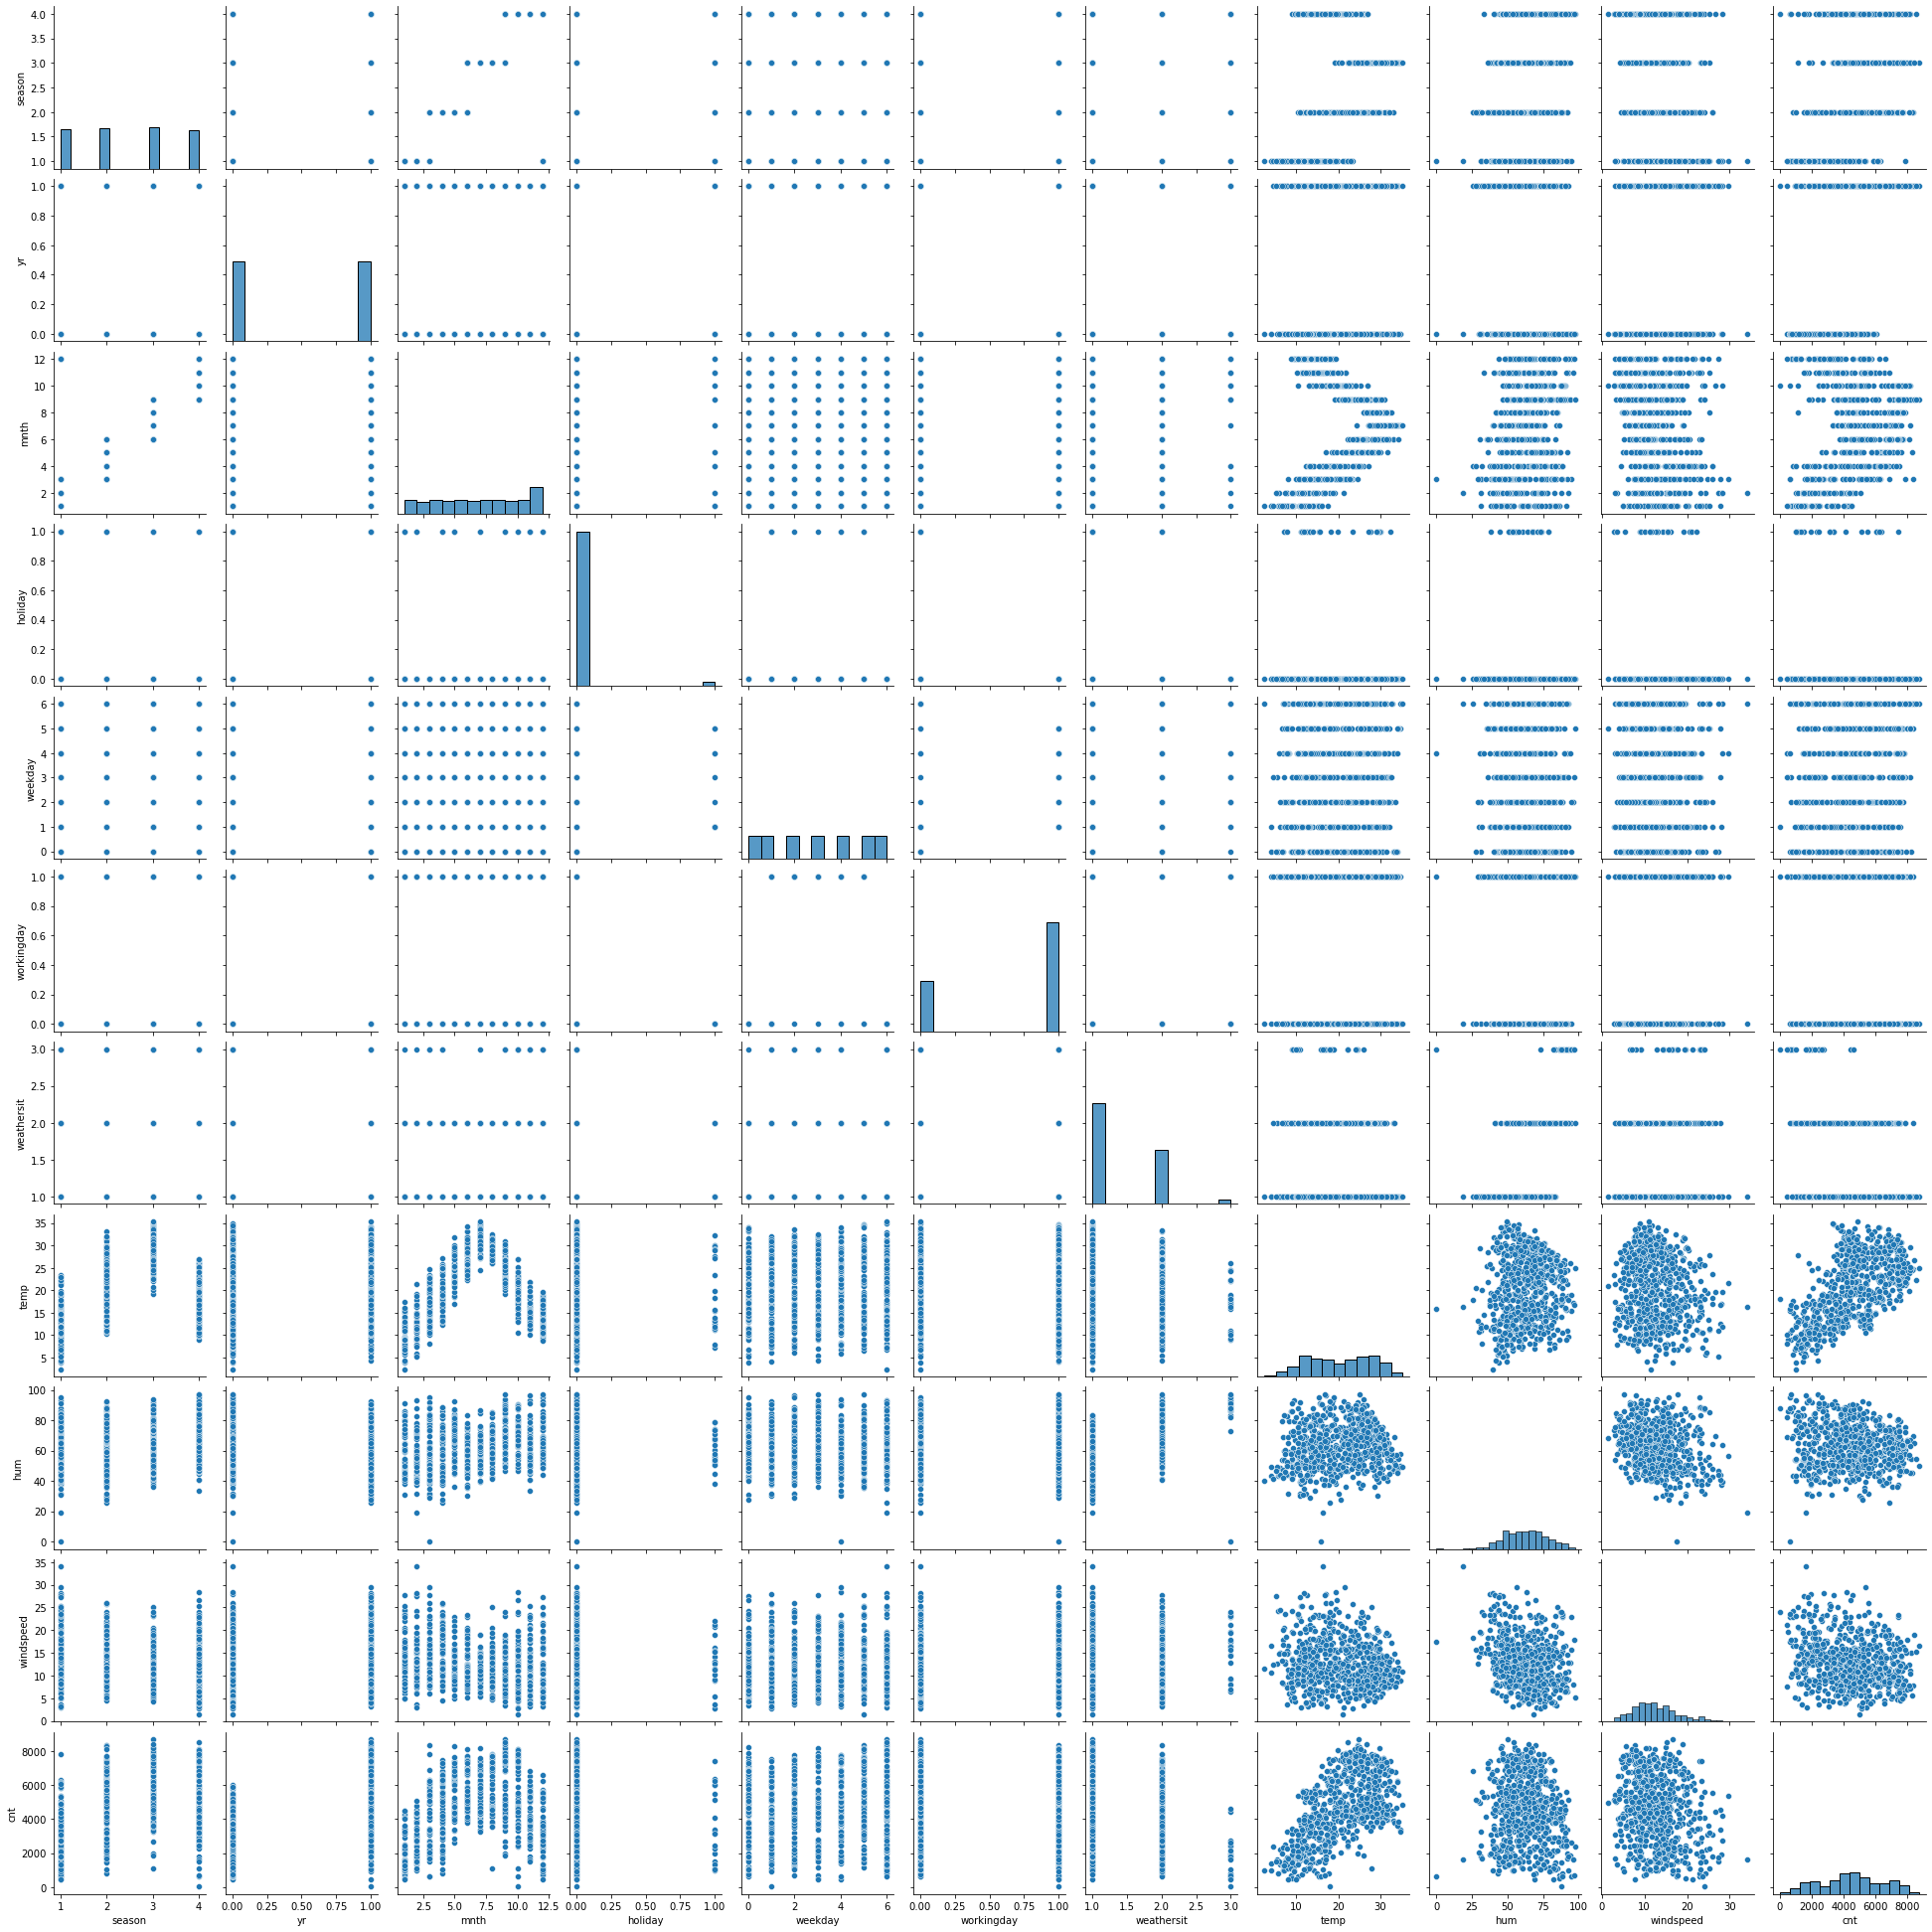

In [29]:
#Create pairplot for all the variables
sns.pairplot(bike_df)
plt.show()

Above pairplot gives how is data set is distributed. Certain variables are correlated to **cnt** target.

### Categorical Variables
Let us convert the categorical variables which are numeric into meaningful string so we could visualize the data and infer some inference from that.

In [30]:
# Defining the map for the season to hold meaningful value
def ss_map(x):
    return x.map({1:'spring', 2: 'summer', 3:'fall',4:'winter'})
# Applying the function to the bike dataframe
bike_df['season'] = bike_df[['season']].apply(ss_map)

In [31]:
# Defining the map for the weathersit to hold meaningful value
def weasit_map(x):
    return x.map({1:'Clear Day', 2: 'Misty Day', 3:'Rainy Day',4:'Snowy Day'})
# Applying the function to the bike dataframe
bike_df['weathersit'] = bike_df[['weathersit']].apply(weasit_map)

In [32]:
#Defining the  month categorical variable to have some meaningful value
def month_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Applying the function to the bike dataframe
bike_df['mnth'] = bike_df[['mnth']].apply(month_map)

In [33]:
#Converting weekday categorical variable to have some proper string
def week_map(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
# Applying the function to the bike dataframe
bike_df['weekday'] = bike_df[['weekday']].apply(week_map)

In [34]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty Day,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty Day,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear Day,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear Day,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear Day,9.305237,43.6957,12.522300,1600


### Visualizing data

Let us visualize categorical data using boxplot.

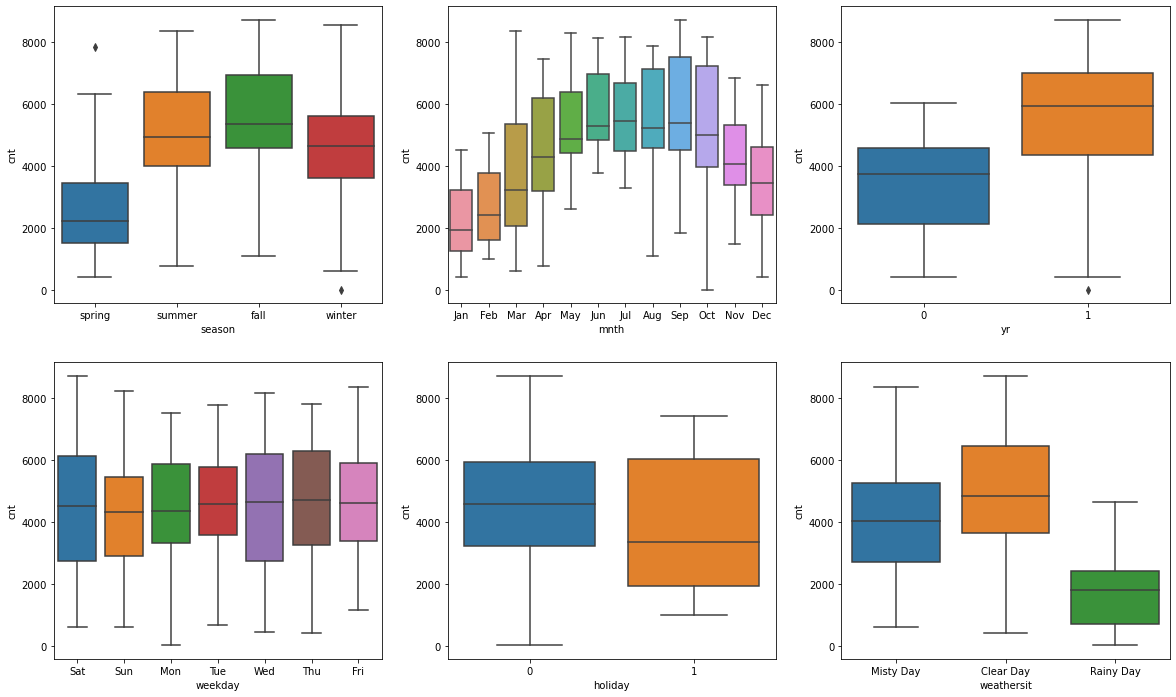

In [35]:
#Create boxplot for the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

### Inference for categorical variables:
With the above plot, few of the insights are:
- Season fall has highest demand for bike booking followed by summer and winter.
- Depending upon the weather condition the demand is more. Also the demand increases steadily from April and peaks between Jul-Sep and decreases slowly during winter. 
- The demand for bike booking is increasing year over year.
- There is less demand of bike during Sunday and Monday compared to other days of the week.
- Demand for bike is more on working day compared to holiday.
- Weather determines the bike demand. So when the day is more clear, then the demand is more. Demand of bike is less during Rainy day.

In [36]:
bike_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty Day,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty Day,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear Day,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear Day,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear Day,9.305237,43.6957,12.522300,1600


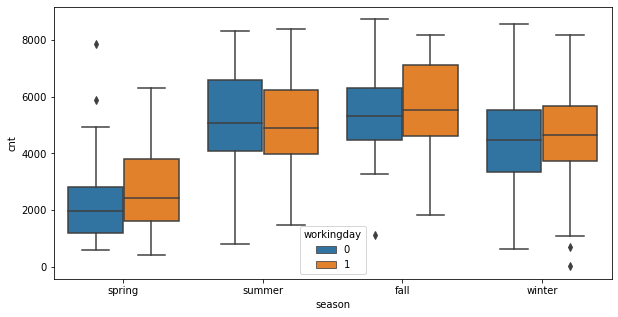

In [37]:
#Create a box plot for season and cnt with hue as workingday
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike_df)
plt.show()

Bike demand is more during fall and summer season. While in summer, demand is more on holiday and during fall, demand is more on working day.

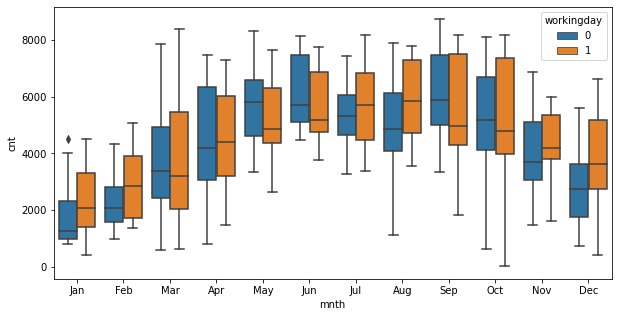

In [38]:
#Create a box plot for mnt and cnt with hue as workingday
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = bike_df)
plt.show()

The demand for bike is more on holiday during May, Sep and Jun. So when it's vacation time, then the demand is more.

### Correlation Analysis using Visualization:
Let us see how the variables are correlated using regression plot.

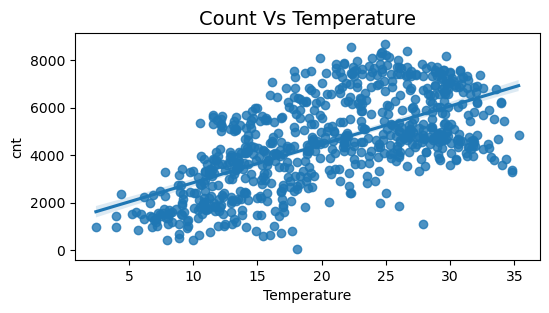

In [39]:
#Create a regression plot for Count Vs Temperature
plt.figure(figsize=(6,3),dpi=100)
plt.title("Count Vs Temperature",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### Inference:
- Demand for bikes is positively correlated with the temperature. The demand is increasing linearly with the temperature increase.

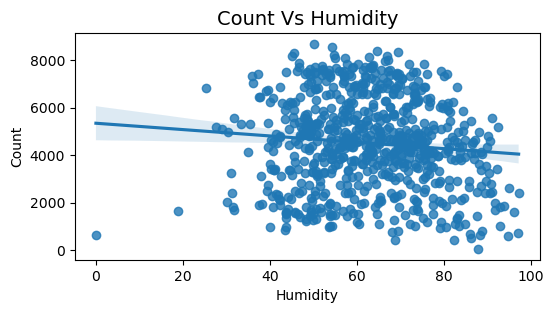

In [40]:
#Create a regression plot for Count Vs Humidity
plt.figure(figsize=(6,3),dpi=100)
plt.title("Count Vs Humidity",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

### Inference:
There is less correlation with humidity. The data is scattered around the humidity value 40-100. Demand decreases as the humidity increases. We see negative correlation here.

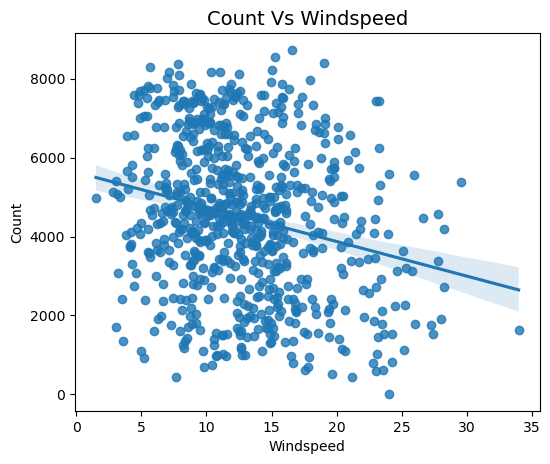

In [41]:
#Create a regression plot for Count Vs Windspeed
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Windspeed",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

### Inference:
As windspeed increases, the demand for the bike decreases as expected. When the windspeed is high, it is difficult to ride bike and hence as expected the demand for bike is less. We could see negative correlation here.

### Correlation Matrix Using HeatMap:

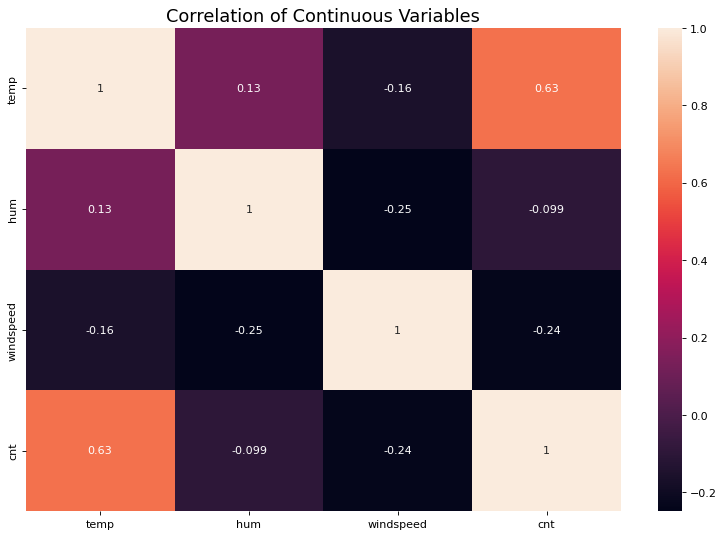

In [42]:
#Create a heatmap matrix for the numeric variables.
cont_var = ["temp","hum","windspeed","cnt"]
plt.figure(figsize=(12,8),dpi=80)
plt.title("Correlation of Continuous Variables",fontsize=16)
sns.heatmap(bike_df[cont_var].corr(),annot= True)
plt.show()

### Inference:
With the above correlation matrix of the continiuos variables, we see **temp** is highly correlated with the bike demand. Then we have **windspeed** followed with **hum**.

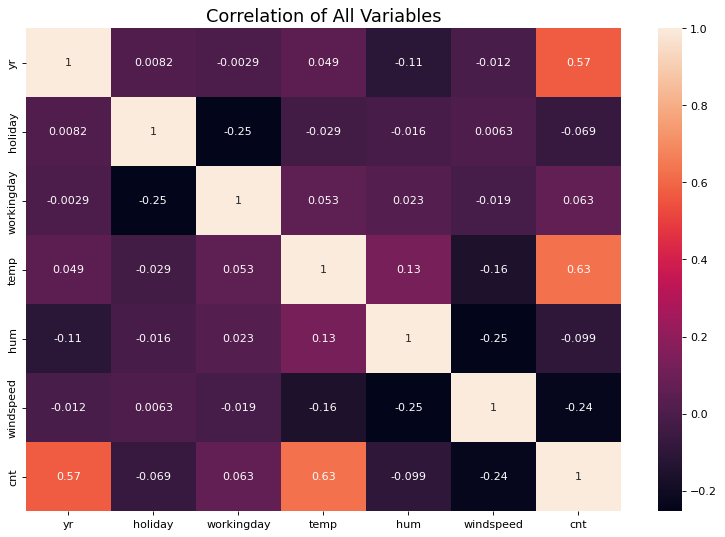

In [43]:
#Create a heatmap for the numeric variables.
plt.figure(figsize=(12,8),dpi=80)
plt.title("Correlation of All Variables",fontsize=16)
sns.heatmap(bike_df.corr(),annot= True)
plt.show()

### Inference:
With the above correlation matrix of all the continiuos variables, we see **temp** is highly correlated with the bike demand followed by **yr**. Then we have **windspeed** followed with **hum**.

### Bivariate Analysis:

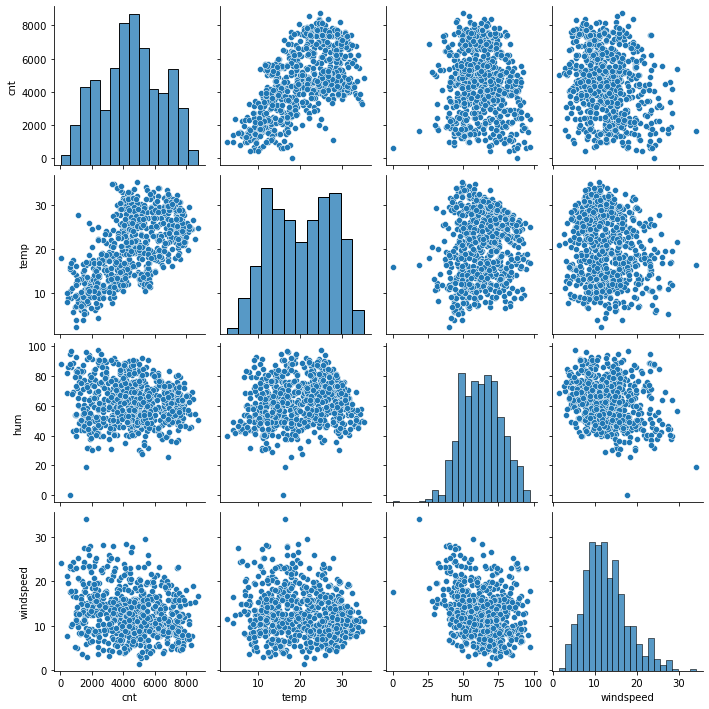

In [44]:
#Create the pairplot for continous variables
sns.pairplot(bike_df[['cnt','temp','hum','windspeed']])
plt.show()

We see that **temp** is highly correlated with the bike demand.

## Dummy Variables for categorical variables:
Let us create dummy variables for the categorical variables present in this data set. We will create (p-1) dummy variables, droping the first one.

In [45]:
#Get the dummies for categorical variable and drop the first data for (p-1) dummy variable.
bike_df = pd.get_dummies(data=bike_df, columns=['mnth','season','weekday'],drop_first = True)
#Dont drop the weather condition dummy variable.
bike_df = pd.get_dummies(data=bike_df, columns=['weathersit'])

In [46]:
bike_df.shape

(730, 30)

Now the shape has changed, where the column is increased from 14 to 30.

In [47]:
#Check the newly created dummy variables
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear Day', 'weathersit_Misty Day',
       'weathersit_Rainy Day'],
      dtype='object')

We could see dummy variables created.

In [48]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Day,weathersit_Misty Day,weathersit_Rainy Day
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [49]:
#Check the shape of data set
bike_df.shape

(730, 30)

## Model Building
Let us the build the mulitple linear regression model using RFE. So before building the model, let us split the data into train and test data.

### Data splitting into train and test data:

In [50]:
#Split the data into train and test using random_state of 200
from sklearn.model_selection import train_test_split
np.random.seed(0)
bikedf_train, bikedf_test = train_test_split(bike_df, train_size=0.7,test_size=0.3,random_state=200)

Let us see how much data is splitted among the train and test data.

In [51]:
#Check the shapes
print(bikedf_train.shape)
print(bikedf_test.shape)

(510, 30)
(219, 30)


We have 510 rows for the train data and 219 rows for the test data.

In [52]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

- Let us consider the MixMaxScaler method.

In [53]:
#Use the MixMaxScaler method for rescaling
scaler = MinMaxScaler()

- Let us consider only continous variables for fit and transform.

In [54]:
##Fit and transform the continous variables.
bikedf_train[cont_var] = scaler.fit_transform(bikedf_train[cont_var])

In [55]:
#Describe and check how the data is transformed 
bikedf_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Day,weathersit_Misty Day,weathersit_Rainy Day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.686275,0.555129,0.649374,0.350547,0.489265,0.074510,0.086275,0.074510,...,0.247059,0.152941,0.145098,0.135294,0.139216,0.154902,0.129412,0.641176,0.337255,0.021569
std,0.500352,0.179682,0.464462,0.232861,0.146392,0.162339,0.233589,0.262857,0.281045,0.262857,...,0.431725,0.360284,0.352545,0.342373,0.346511,0.362166,0.335985,0.480126,0.473237,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353506,0.542353,0.234958,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560983,0.647488,0.330767,0.494265,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.763381,0.756118,0.438134,0.655952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since we had used MixMaxScaler method, we could see the value ranges between 0-1 for the continous variables.

In [56]:
#Check out the data of train data set
bikedf_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Day,weathersit_Misty Day,weathersit_Rainy Day
728,1,0,0,0.252441,0.498067,0.676936,0.164795,0,1,0,...,0,0,0,1,0,0,0,1,0,0
56,0,0,0,0.286664,0.554315,0.338464,0.185682,0,0,1,...,0,0,1,0,0,0,0,1,0,0
13,0,0,1,0.130569,0.554222,0.214724,0.119522,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120,0,0,0,0.503767,0.785315,0.173093,0.352529,0,0,0,...,0,0,0,1,0,0,0,0,1,0
252,0,0,0,0.771134,0.776728,0.270509,0.593263,0,0,0,...,0,0,1,0,0,0,0,1,0,0


- Since our target variable is **cnt** let us remove as target variable y_train.

In [57]:
#Remove the target variable in y_train
y_train = bikedf_train.pop('cnt')

In [58]:
X_train = bikedf_train

In [59]:
import statsmodels.api as sm

## Building model using RFE method

In [60]:
#Building a Linear regression model using SKLearn RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 15)             #Select 15 columns
rfe = rfe.fit(X_train, y_train)

- Check the ranking of the columns and consider dependently.

In [61]:
#Check the ranking of each column
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Clear Day', True, 1),
 ('weathersit_Misty Day', False, 4),
 ('weathersit_Rainy Day', True, 1)]

In [62]:
#Obtain the columns depending upon the ranking
rank_col = X_train.columns[rfe.support_]
print(rank_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Clear Day', 'weathersit_Rainy Day'],
      dtype='object')


In [63]:
#Columns with less ranking
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Misty Day'],
      dtype='object')

In [64]:
X_train.shape

(510, 29)

In [65]:
X_train_rfe = X_train[rank_col]

In [66]:
#Shape of the training data set using RFE model
X_train_rfe.shape

(510, 15)

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
#Fitting the model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.99e-194
Time:                        17:52:16   Log-Likelihood:                 507.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     494   BIC:                            -914.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2514 

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.78
11,season_spring,5.80
3,temp,4.23
13,season_winter,3.48
12,season_summer,2.41
8,mnth_Jan,2.39
7,mnth_Feb,1.99
4,hum,1.84
9,mnth_Nov,1.83
6,mnth_Dec,1.64


### Elimination of columns:

- We need to consider the below rule while dropping variables from model building:
 - High p-value, high VIF - Drop
 - High p-value, low VIF  - Drop (High priority) 
 - Low  p-value, high VIF - Drop (Low priority)
 - Low  p-value, low VIF  - Keep
* With the above summary and VIF value, we could see that mnth_Feb is having highest p-value.

In [71]:
#Drop the variable.
X_train_new = X_train_rfe.drop(["mnth_Feb"], axis = 1)

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [73]:
#Fit the model
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          7.77e-195
Time:                        17:52:16   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2432 

* Here most of the variables have p-values < 0.05. So let us look and VIF and try to remove the variable.

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,105.61
10,season_spring,5.16
3,temp,4.03
12,season_winter,3.48
11,season_summer,2.37
4,hum,1.83
8,mnth_Nov,1.78
7,mnth_Jan,1.63
13,weathersit_Clear Day,1.58
6,mnth_Dec,1.45


Using the above VIF value, we can see that **const** has highest VIF. So let us remove it first.

In [76]:
#Drop the variable.
X_train_new = X_train_new.drop(["const"], axis = 1)

In [77]:
#Add the constant
X_train_lm = sm.add_constant(X_train_new)

In [78]:
#Fit the model
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [79]:
#Check the summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          7.77e-195
Time:                        17:52:16   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2432 

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.78
2,temp,18.24
4,windspeed,5.65
9,season_spring,4.89
11,season_winter,3.85
12,weathersit_Clear Day,3.47
10,season_summer,2.73
0,yr,2.03
7,mnth_Nov,1.90
6,mnth_Jan,1.74


Now we have **hum** with highest VIF value. Let us remove it now.

In [81]:
#Drop the variable.
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [82]:
#Add the constant
X_train_lm = sm.add_constant(X_train_new)

In [83]:
#Fit the model
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [84]:
# Check the summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          1.04e-189
Time:                        17:52:16   Log-Likelihood:                 490.37
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     496   BIC:                            -893.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0995 

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.63
2,temp,5.07
8,season_spring,2.93
11,weathersit_Clear Day,2.91
10,season_winter,2.69
0,yr,2.02
9,season_summer,1.99
6,mnth_Nov,1.83
5,mnth_Jan,1.65
4,mnth_Dec,1.43


Now **windspeed** has the highest VIF. So let us drop it.

In [86]:
#Drop the variable
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [87]:
#Add the constant
X_train_lm = sm.add_constant(X_train_new)

In [88]:
#Fit the model
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [89]:
#Check the summary
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          2.01e-185
Time:                        17:52:16   Log-Likelihood:                 477.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     497   BIC:                            -873.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0453 

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.88
10,weathersit_Clear Day,2.89
9,season_winter,2.58
7,season_spring,2.19
0,yr,2.01
5,mnth_Nov,1.80
8,season_summer,1.69
4,mnth_Jan,1.65
3,mnth_Dec,1.43
6,mnth_Sep,1.22


In [91]:
#Check the remaining columns
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Clear Day', 'weathersit_Rainy Day'],
      dtype='object')

### Prediction

In [92]:
#Predict the model
y_train_pred = lm1.predict(X_train_lm)

### Residual Analysis:
Let us check whether the error terms is normally distributed using the distribution plot.

Text(0.5, 0, 'Errors')

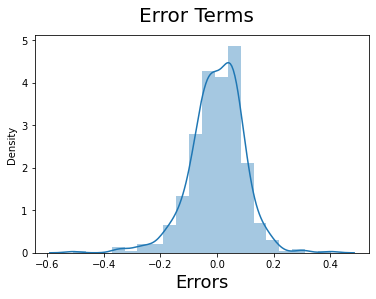

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

* From the above plot, we see that error terms are normally distributed.

## Prediction for the test data
Let us predict the model for the test data with the designed model.

In [94]:
#Create the test data frame for the continous variable.
bikedf_test[cont_var] = scaler.transform(bikedf_test[cont_var])

In [95]:
#Create target and independent variables.
y_bike_test = bikedf_test.pop('cnt')
X_bike_test = bikedf_test

In [96]:
#Check the columns
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Clear Day', 'weathersit_Rainy Day'],
      dtype='object')

In [97]:
#Create the X test data
X_test_new = X_bike_test[X_train_new.columns]

In [98]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [99]:
X_test_new.shape, X_train_new.shape

((219, 13), (510, 12))

In [100]:
#Predict for the test data set
y_pred = lm1.predict(X_test_new)

## Model Evaluation
Let us evaluate the model using the assumptions:
- Assumptions of linear regression
  - Error terms are normally distributed.
  - Error terms are independent of each other
  - Error terms have constant variance(homoscedasticity)

### Residual Analysis for Test Data:

Text(0.5, 0, 'Errors')

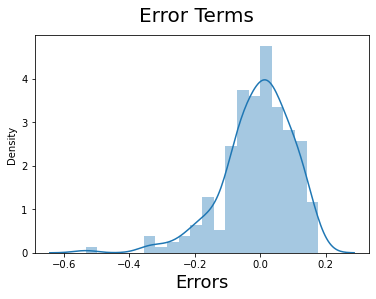

In [101]:
# Plot the histogram of the error terms for test data
fig = plt.figure()
sns.distplot((y_bike_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

* For test data also, the error terms are normally distributed and with mean as 0.

Text(0, 0.5, 'y_pred')

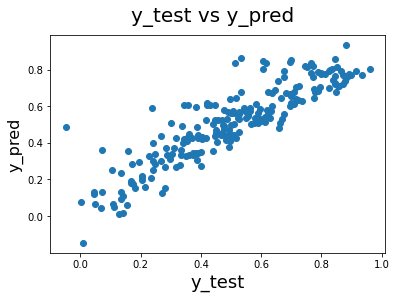

In [102]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

* Here we could see that the error terms have contant variance (having homoscedasticity)

### Assumptions for Residual Analysis:

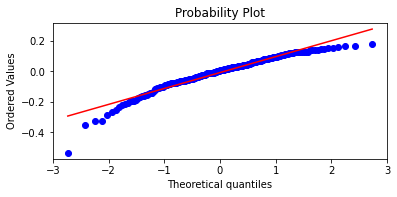

In [103]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot((y_bike_test - y_pred), plot=ax, fit=True)

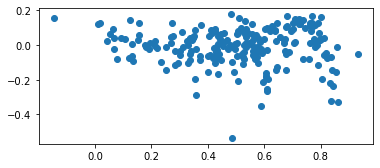

In [104]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, (y_bike_test - y_pred))

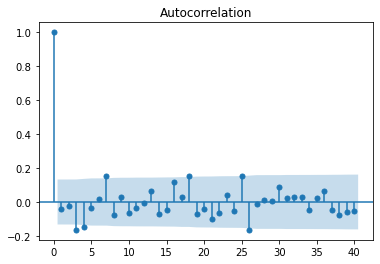

In [105]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf((y_bike_test - y_pred), lags=40 , alpha=0.05)
acf.show()

### Adjusted R^2 Value Formula:

Formula for Adjusted R^2:

R2adj=1−(1−R2)∗n−1n−p−1

### R^2 value for train data set:

In [106]:
r2 = r2_score(y_train,y_train_pred)
print(r2)

0.8346541748639539


### Adjusted R^2 value for train data:

In [107]:
#Adjusted R^2 for train data
# n is number of rows in X
n = X_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8246645312619845

### R^2 value for test data set:

In [108]:
r2_test = r2_score(y_bike_test ,y_pred)
print(r2_test)

0.7888329504753651


### Adjusted R^2 for test data:

In [109]:
#Adjusted R^2 for test data
# n is number of rows in X
n = X_test_new.shape[0]
p = X_test_new.shape[1]
adjusted_r2_test = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_test

0.8241688298553266

## Final Model:

We can see that the equation of our best fitted line is:

$ cnt = 0.0453 + (yr * 0.2449) + (holiday * (-0.0784)) + (temp * 0.4732) + (mnth_Dec * (-0.0694)) + (mnth_Jan * (-0.0341)) + (mnth_Nov * (-0.0875)) + (mnth_Sep * 0.0683)  + (season_spring * (-0.0747)) + (season_summer * 0.0419) + (season_winter * 0.141) + (weathersit_Clear Day * 0.0832) + (weathersit_Rainy Day * (-0.1787)) $


## Conclusion:
- Important factors that are significant in predicting the demand for shared bikes are:
 - temperature
 - windspeed
 - weathersit
 - holiday
 - month

- Bike demands are high during the clear day with less attributing factors on the weather. The demand is high during fall and summer and during holidays. Also the demand rises from third quarter and fourth quarter and reduces next two quarters. So when the weather is pleasant people prefer to take the bikes and the demand is equal during workday or holiday mostly. When the weather is rainy/foggy, then the company can go in for the maintenance of the bikes. The demand is increasing slowly year over year. Company can roll out offers during Feb-Apr, to bring in more demand in the bikes.
